In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from highlight_text import fig_text, ax_text

In [37]:
data = "historicalFlood.xlsx"
df = pd.read_excel(data, sheet_name="Trimmu_Panjnad")
df.head()

,Date,Inflow,Outflow,Structure
0,2012-07-01,22800,5900.0,Trimmu
1,2012-07-02,19200,2300.0,Trimmu
2,2012-07-03,16500,NaN,Trimmu
3,2012-07-04,15500,NaN,Trimmu
4,2012-07-05,21500,4600.0,Trimmu


In [38]:
print(df.Structure.unique())

['Trimmu' 'Panjnad' 'Qadirabad']


In [39]:
struct = "Trimmu"
year = 2014

df_trimmu = df[(df["Structure"] == struct) & (df["Date"].dt.year == year)].copy()
df_trimmu.head()

df_trimmu["Date"] = pd.to_datetime(df_trimmu["Date"])
df_trimmu["Inflow"] = pd.to_numeric(df['Inflow'], errors='coerce').fillna(0)
df_trimmu["Outflow"] = pd.to_numeric(df['Outflow'], errors='coerce').fillna(0)
df_trimmu['structure'] = df['Structure'].str.strip()

df_trimmu.set_index("Date", inplace=True)

df_trimmu = df_trimmu.sort_index()
df_trimmu.head()

,Inflow,Outflow,Structure,structure
Date,,,,
2014-07-01,19500.0,3900.0,Trimmu,Trimmu
2014-07-02,23900.0,8300.0,Trimmu,Trimmu
2014-07-03,29100.0,13500.0,Trimmu,Trimmu
2014-07-04,41600.0,26000.0,Trimmu,Trimmu
2014-07-05,45200.0,29600.0,Trimmu,Trimmu


In [40]:
struct = "Qadirabad"
year = 2014

df_Qadirabad = df[(df["Structure"] == struct) & (df["Date"].dt.year == year)].copy()
df_Qadirabad.head()

df_Qadirabad["Date"] = pd.to_datetime(df_Qadirabad["Date"])
df_Qadirabad["Inflow"] = pd.to_numeric(df['Inflow'], errors='coerce').fillna(0)
df_Qadirabad["Outflow"] = pd.to_numeric(df['Outflow'], errors='coerce').fillna(0)
df_Qadirabad['structure'] = df['Structure'].str.strip()

df_Qadirabad.set_index("Date", inplace=True)

df_Qadirabad = df_Qadirabad.sort_index()
df_Qadirabad.head()

,Inflow,Outflow,Structure,structure
Date,,,,
2014-07-01,55800.0,33800.0,Qadirabad,Qadirabad
2014-07-02,86700.0,53000.0,Qadirabad,Qadirabad
2014-07-03,71600.0,49500.0,Qadirabad,Qadirabad
2014-07-04,82000.0,60000.0,Qadirabad,Qadirabad
2014-07-05,73000.0,51000.0,Qadirabad,Qadirabad


In [41]:
struct = "Panjnad"
year = 2014

df_Panjnad = df[(df["Structure"] == struct) & (df["Date"].dt.year == year)].copy()
df_Panjnad.head()

df_Panjnad["Date"] = pd.to_datetime(df_Panjnad["Date"])
df_Panjnad["Inflow"] = pd.to_numeric(df['Inflow'], errors='coerce').fillna(0)
df_Panjnad["Outflow"] = pd.to_numeric(df['Outflow'], errors='coerce').fillna(0)
df_Panjnad['structure'] = df['Structure'].str.strip()

df_Panjnad.set_index("Date", inplace=True)

df_Panjnad = df_Panjnad.sort_index()
df_Panjnad.head()

,Inflow,Outflow,Structure,structure
Date,,,,
2014-07-01,17200.0,2100.0,Panjnad,Panjnad
2014-07-02,15100.0,0.0,Panjnad,Panjnad
2014-07-03,9200.0,0.0,Panjnad,Panjnad
2014-07-04,11000.0,0.0,Panjnad,Panjnad
2014-07-05,11400.0,0.0,Panjnad,Panjnad


In [42]:
trimmuPeak = df_trimmu["Outflow"].idxmax()
punjnadPeak =  df_Panjnad["Outflow"].idxmax()
qadirabadPeak = df_Qadirabad["Outflow"].idxmax()

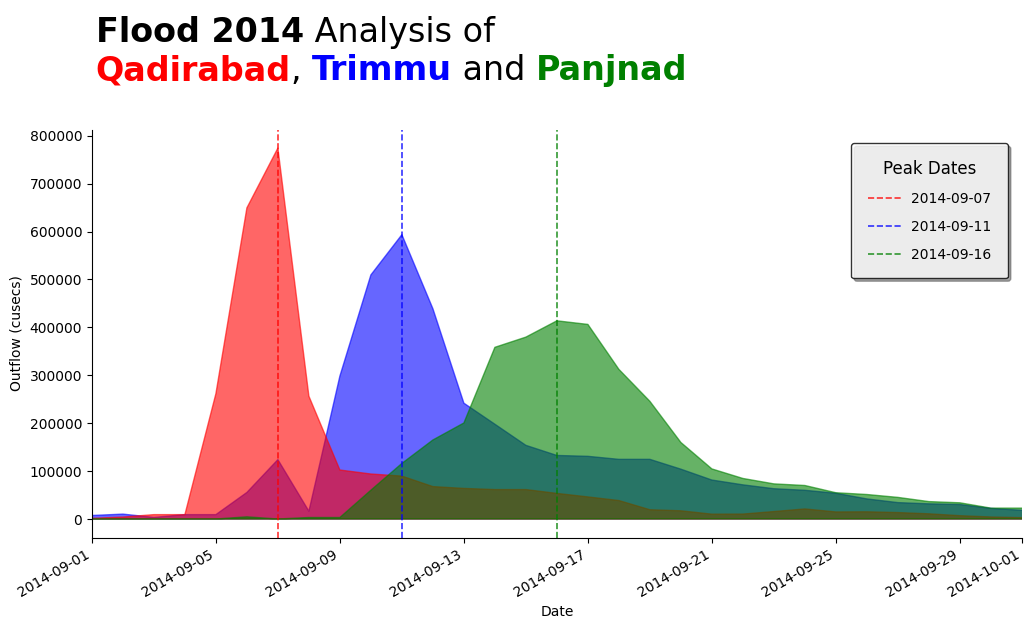

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.fill_between(df_trimmu.index, df_trimmu["Outflow"], color="blue", alpha=0.6)
ax.fill_between(df_Qadirabad.index, df_Qadirabad["Outflow"], color="red", alpha=0.6)
ax.fill_between(df_Panjnad.index, df_Panjnad["Outflow"], color="green", alpha=0.6)

ax.axvline(qadirabadPeak, color="red", linestyle="--", linewidth=1.2, alpha=0.8, label=f"{qadirabadPeak.date()}")
ax.axvline(trimmuPeak, color="blue", linestyle="--", linewidth=1.2, alpha=0.8, label=f"{trimmuPeak.date()}")
ax.axvline(punjnadPeak, color="green", linestyle="--", linewidth=1.2, alpha=0.8, label=f"{punjnadPeak.date()}")

ax.set_xlabel("Date")
ax.set_ylabel("Outflow (cusecs)")

fig.autofmt_xdate()
sns.despine()

ax.set_xlim([pd.to_datetime("2014-09-01"), pd.to_datetime("2014-10-01")])

text = """<Flood 2014> Analysis of\n<Qadirabad>, <Trimmu> and <Panjnad>
"""
fig_text(0.128, 1.07, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "red"}, {"fontweight": "bold", "color": "blue"}, {"fontweight": "bold", "color": "green"}])

ax.legend(
    title="Peak Dates",             
    title_fontsize=12,              
    fontsize=10,                    
    loc="upper right",             
    frameon=True,                   
    fancybox=True,                  
    shadow=True,                    
    framealpha=0.8,                
    facecolor="white",              
    edgecolor="black",              
    borderpad=1.2,                  
    labelspacing=1.0,               
    handlelength=2.5,               
    handletextpad=0.6,              
    borderaxespad=1.0               
)

fig.savefig("Flood_2014_peaks.png", bbox_inches="tight", dpi=600)

In [44]:
flood_2025 = pd.read_csv("pm_dashboard_data.csv")
flood_2025.head()

,Name of Structure,Inflow_Discharge,Outflow_Discharge,River,Date
0,Taunsa,158775.0,133869.0,Indus,15/06/2025 6:00
1,Tarbela Dam,178000.0,151700.0,Indus,15/06/2025 6:00
2,Sulemanki,14862.0,2654.0,Sutlej,15/06/2025 6:00
3,Sukkur,80240.0,32400.0,Indus,15/06/2025 6:00
4,Sidhnai,11200.0,0.0,Ravi,15/06/2025 6:00


In [45]:
print(f"Structures: {flood_2025["Name of Structure"].unique()}")

Structures: ['Taunsa' 'Tarbela Dam' 'Sulemanki' 'Sukkur' 'Sidhnai' 'Rasul' 'Q.Abad'
 'Panjnad' 'Marala' 'Mangla Dam' 'Kotri' 'Khanki' 'Kalabagh' 'KABUL'
 'Jassar' 'Islam' 'Guddu' 'Ganda Singh Wala' 'Chashma' 'Balloki' 'Trimmu'
 'Shahdara' 'Thein Dam' 'Harike' 'Bhakra Dam' 'Pong Dam' 'Skardu'
 'Partab Bridge (Bunji)' 'Muzaffarabad' 'Kotli' 'Domel' 'Chattar Klass'
 'Besham' 'Azad Pattan' 'Chiniot']


In [46]:
marala = flood_2025.loc[flood_2025["Name of Structure"] == "Marala", :].copy()
khanki = flood_2025.loc[flood_2025["Name of Structure"] == "Khanki", :].copy()
qadarabad = flood_2025.loc[flood_2025["Name of Structure"] == 'Q.Abad', :].copy()
trimmu = flood_2025.loc[flood_2025["Name of Structure"] == 'Trimmu', :].copy()
panjnad = flood_2025.loc[flood_2025["Name of Structure"] == 'Panjnad', :].copy()

In [47]:
marala["Date"] = pd.to_datetime(marala["Date"], dayfirst=True)
khanki["Date"] = pd.to_datetime(khanki["Date"], dayfirst=True)
qadarabad["Date"] = pd.to_datetime(qadarabad["Date"], dayfirst=True)
trimmu["Date"] = pd.to_datetime(trimmu["Date"], dayfirst=True)
panjnad["Date"] = pd.to_datetime(panjnad["Date"], dayfirst=True)

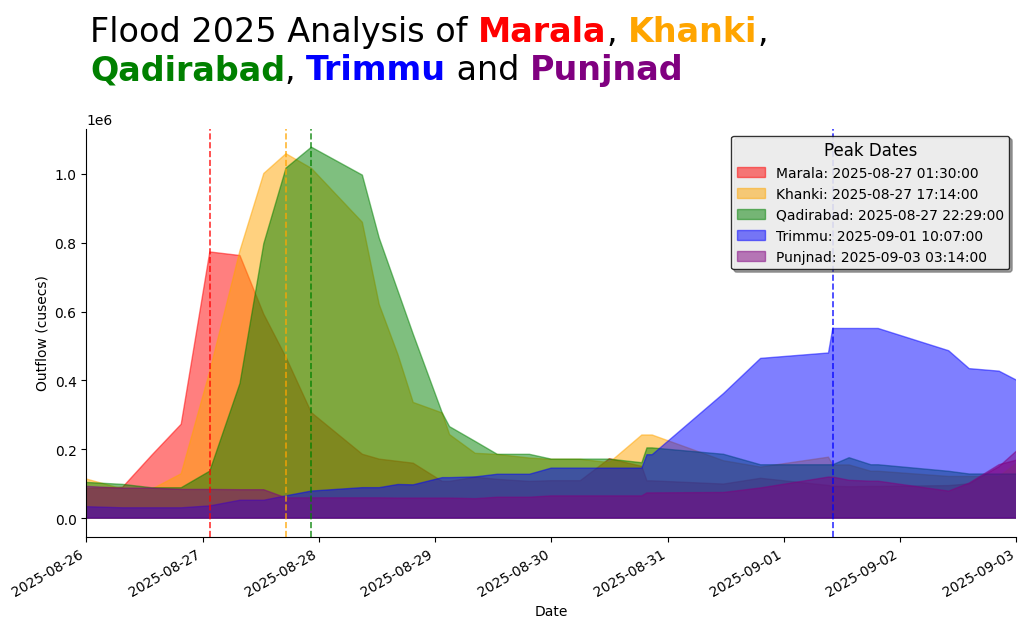

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.fill_between(marala["Date"], marala["Outflow_Discharge"], color="red", alpha=.5, label="Marala")
ax.fill_between(khanki["Date"], khanki["Outflow_Discharge"], color="orange", alpha=.5, label="Khanki")
ax.fill_between(qadarabad["Date"], qadarabad["Outflow_Discharge"], color="green", alpha=.5, label="Qadirabad")
ax.fill_between(trimmu["Date"], trimmu["Outflow_Discharge"], color="blue", alpha=.5, label="Trimmu")
ax.fill_between(panjnad["Date"], panjnad["Outflow_Discharge"], color="purple", alpha=.5, label="Punjnad")

maralaPeakIdx = marala["Outflow_Discharge"].idxmax()
khankiPeakIdx = khanki["Outflow_Discharge"].idxmax()
qadarabadPeakIdx = qadarabad["Outflow_Discharge"].idxmax()
trimmuPeakIdx = trimmu["Outflow_Discharge"].idxmax()
panjnadPeakIdx = panjnad["Outflow_Discharge"].idxmax()

maralaPeakDate = pd.to_datetime(marala.loc[maralaPeakIdx, "Date"])
khankiPeakDate = pd.to_datetime(khanki.loc[khankiPeakIdx, "Date"])
qadarabadPeakDate = pd.to_datetime(qadarabad.loc[qadarabadPeakIdx, "Date"])
trimmuPeakDate = pd.to_datetime(trimmu.loc[trimmuPeakIdx, "Date"])
panjnadPeakDate = pd.to_datetime(panjnad.loc[panjnadPeakIdx, "Date"])

ax.axvline(maralaPeakDate, color="red", linestyle="--", linewidth=1.2, alpha=.8)
ax.axvline(khankiPeakDate, color="orange", linestyle="--", linewidth=1.2, alpha=.8)
ax.axvline(qadarabadPeakDate, color="green", linestyle="--", linewidth=1.2, alpha=.8)
ax.axvline(trimmuPeakDate, color="blue", linestyle="--", linewidth=1.2, alpha=.8)
ax.axvline(panjnadPeakDate, color="purple", linestyle="--", linewidth=1.2, alpha=.8)

ax.set_xlabel("Date")
ax.set_ylabel("Outflow (cusecs)")
fig.autofmt_xdate()
sns.despine()

ax.set_xlim([pd.to_datetime("2025-08-26"), pd.to_datetime("2025-09-03")])

text = """Flood 2025 Analysis of <Marala>, <Khanki>,\n<Qadirabad>, <Trimmu> and <Punjnad>"""
fig_text(
    0.128, 1.07, text, fontsize=24, ha='left', va='top', color='black',
    highlight_textprops=[
        {"fontweight": "bold", "color": "red"},
        {"fontweight": "bold", "color": "orange"},
        {"fontweight": "bold", "color": "green"},
        {"fontweight": "bold", "color": "blue"},
        {"fontweight": "bold", "color": "purple"}
    ]
)

ax.legend(
    title="Peak Dates",
    labels=[
        f"Marala: {maralaPeakDate}",
        f"Khanki: {khankiPeakDate}",
        f"Qadirabad: {qadarabadPeakDate}",
        f"Trimmu: {trimmuPeakDate}",
        f"Punjnad: {panjnadPeakDate}"
    ],
    fontsize=10,
    title_fontsize=12,
    loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8,
    facecolor="white",
    edgecolor="black"
    
)

fig.savefig("Flood_2025_peaks.png", bbox_inches="tight", dpi=600)

In [49]:
100 * (qadarabad["Outflow_Discharge"].max() - trimmu["Outflow_Discharge"].max()) / qadarabad["Outflow_Discharge"].max()

48.88775092745403

In [50]:
def get_attenuation(upstream, downstream):
    return 100 * (upstream - downstream) / upstream

In [51]:
print(f"Change between Marala and Khanki is: {get_attenuation(marala["Outflow_Discharge"].max(), khanki["Outflow_Discharge"].max()):.2f}")
print(f"Change between Khanki and Qadarabad is: {get_attenuation(khanki["Outflow_Discharge"].max(), qadarabad["Outflow_Discharge"].max()):.2f}")
print(f"Change between Qadarabad and Trimmu is: {get_attenuation(qadarabad["Outflow_Discharge"].max(), trimmu["Outflow_Discharge"].max()):.2f}")
print(f"Change between Trimmu and Punjnad is: {get_attenuation(trimmu["Outflow_Discharge"].max(), panjnad["Outflow_Discharge"].max()):.2f}")

Change between Marala and Khanki is: -36.91
Change between Khanki and Qadarabad is: -1.80
Change between Qadarabad and Trimmu is: 48.89
Change between Trimmu and Punjnad is: 66.95
